In [13]:
# Add parent directory to system path
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import networkx as nx
import synthesis.graph_generator
import matplotlib.pyplot as plt
from synthesis import combinations

In [41]:
from synthesis import combinations
combinations.find_closest_nCr(1e7, 200)

(125, 4)

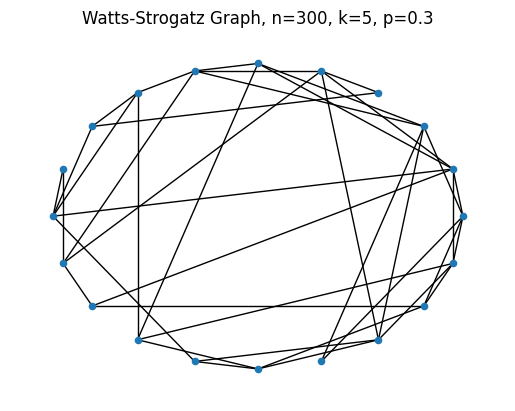

In [35]:
plt.figure()  
plt.title("Watts-Strogatz Graph, n=300, k=5, p=0.3")
# Add annotations
#plt.annotate('Clustering Co-Efficient', xy=(0.5, 0.5), xytext=(0.5, 0.5))
G = nx.watts_strogatz_graph(20, 5, 0.5)
nx.draw_circular(G, node_size=20)
plt.show()



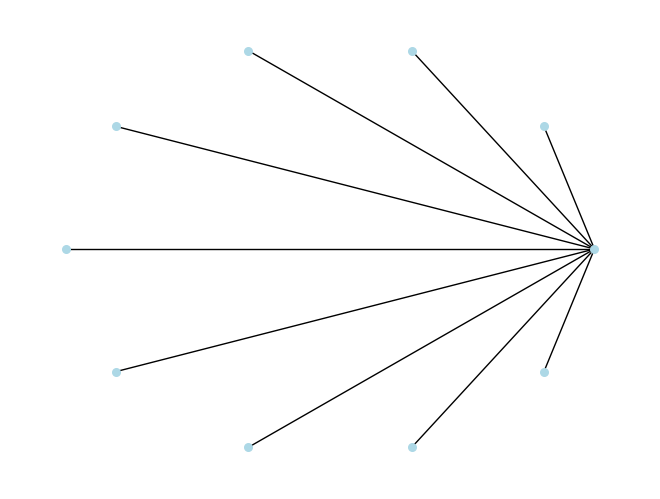

In [10]:
import networkx as nx
import random

def create_imbalanced_tree(num_nodes, imbalance_factor=0.8):
    G = nx.DiGraph()
    
    def add_nodes(parent, nodes_left, level):
        if nodes_left == 0:
            return
        
        num_children = int(nodes_left * imbalance_factor) + 1
        num_children = min(num_children, nodes_left)
        
        for i in range(num_children):
            child = parent * 10 + i + 1
            G.add_edge(parent, child)
            add_nodes(child, nodes_left - num_children, level + 1)
    
    add_nodes(1, num_nodes - 1, 0)
    
    return G

# Example usage
num_nodes = 10
imbalance_factor = 0.9
imbalanced_tree = create_imbalanced_tree(num_nodes, imbalance_factor)

# Draw the imbalanced tree
pos = nx.circular_layout(imbalanced_tree,)
nx.draw(imbalanced_tree, pos, with_labels=False, node_size=30, node_color='lightblue', font_size=12, arrows=False)

[]


/var/folders/xm/ytd6ktbs0_n7mq72_0yz20pr0000gn/T/ipykernel_60796/782499595.py:33: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(imbalanced_tree, prog='twopi')  #twopi, dot, circo


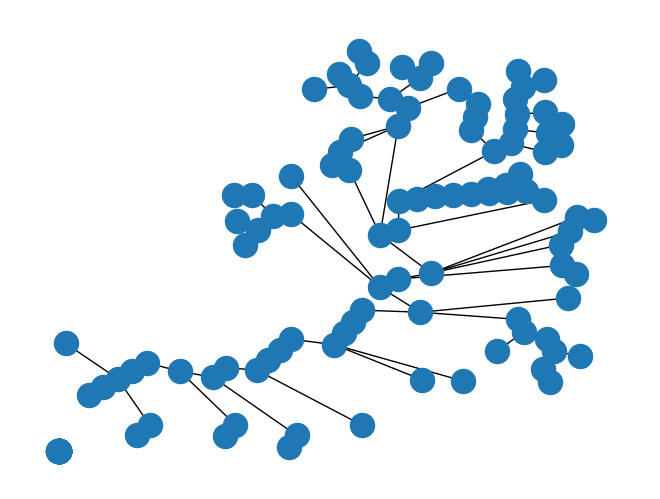

In [11]:
import networkx as nx
import random

import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def create_imbalanced_tree(num_nodes, imbalance_factor):
    # Generate a random degree sequence with imbalance
    degrees = [1] * (num_nodes - 1)
    remaining_edges = int(num_nodes * imbalance_factor)
    
    while remaining_edges > 0:
        node = random.randint(0, num_nodes - 2)
        degrees[node] += 1
        remaining_edges -= 1
    
    # Create the tree using the imbalanced degree sequence
    tree = nx.random_tree(num_nodes, seed=42)
    
    # Assign the degrees to the nodes
    for i, (node, degree) in enumerate(zip(tree.nodes(), degrees)):
        tree.nodes[node]['pos'] = (i, degree)
    
    return tree

# Example usage
num_nodes = 100
imbalance_factor = 0.99
imbalanced_tree = create_imbalanced_tree(num_nodes, imbalance_factor)
imbalanced_tree.remove_nodes_from(nx.isolates(imbalanced_tree))
print(list(nx.isolates(imbalanced_tree)))

pos = graphviz_layout(imbalanced_tree, prog='twopi')  #twopi, dot, circo
nx.draw(imbalanced_tree, pos)

# Draw the imbalanced tree
nx.draw(imbalanced_tree)

In [21]:
num_nodes = 100
gamma = 2.5  # Power-law exponent
seed = 42

powerlaw_tree = nx.random_powerlaw_tree(num_nodes, gamma=gamma, seed=seed)
nx.draw(powerlaw_tree)

NetworkXError: Exceeded max (100) attempts for a valid tree sequence.